## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
df = pd.read_csv('/kaggle/input/laptop/laptop.csv.txt')

## EDA

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1270,1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
99,99,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62kg,66546.72
176,176,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,2.1kg,23922.72
193,193,Lenovo,Notebook,17.3,1600x900,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,No OS,2.8kg,37189.44
248,248,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49kg,35964.00


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
#drop column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Feature Engineering

## Removing units from Ram & Weight

In [11]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [12]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2,19660.32


## Typecasting

In [13]:
#converting columns to suitable datatype

df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<AxesSubplot:xlabel='Price', ylabel='Count'>

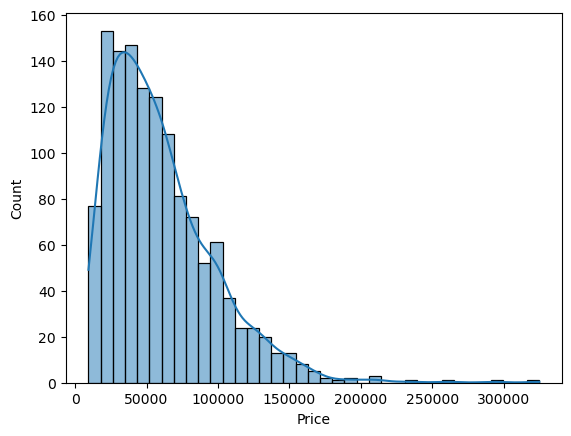

In [15]:
#checking price distribution, target variable distribution looks normal

sns.histplot(df['Price'],kde=True)

In [16]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot:>

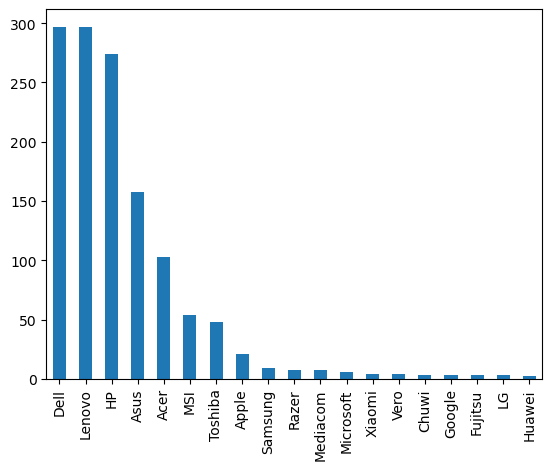

In [17]:
df['Company'].value_counts().plot(kind='bar')

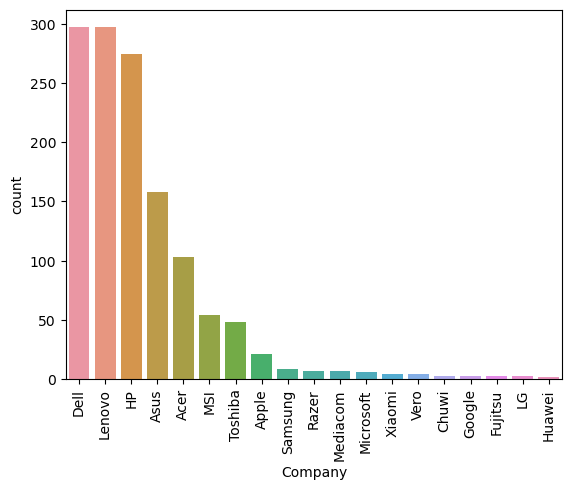

In [18]:
sns.countplot(x=df['Company'],order=df['Company'].value_counts().index)
plt.xticks(rotation='90')
plt.show()

## Comparing Price & Companies

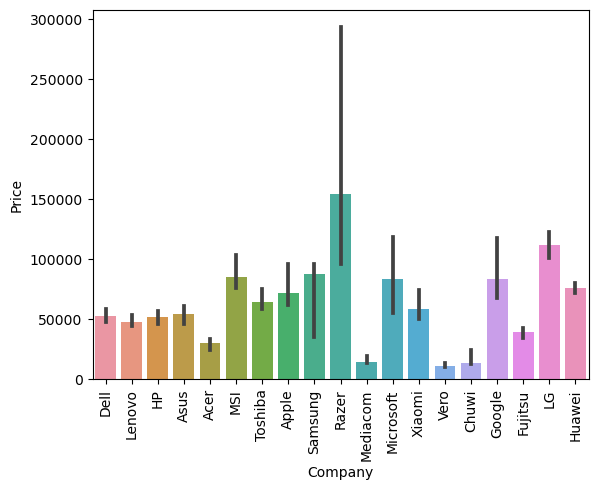

In [19]:
#Bar is median, line is std. deviation
sns.barplot(x=df['Company'],y=df['Price'],estimator='median',order=df['Company'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

## Checking which type are maximum laptops

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

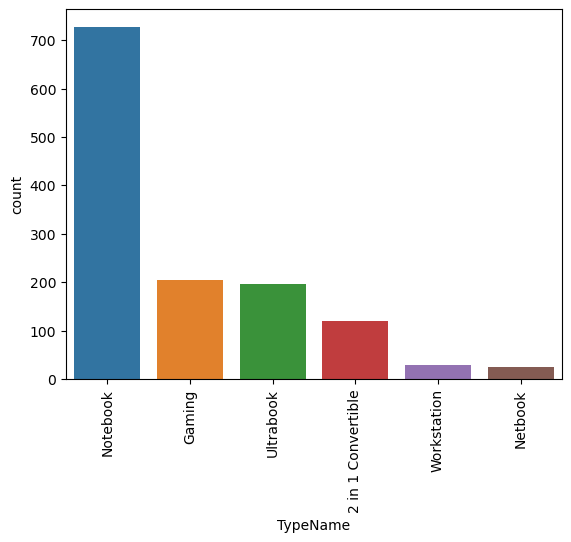

In [20]:
sns.countplot(x=df['TypeName'],order=df['TypeName'].value_counts().index)
plt.xticks(rotation=90)

## Checking laptop type price distribution

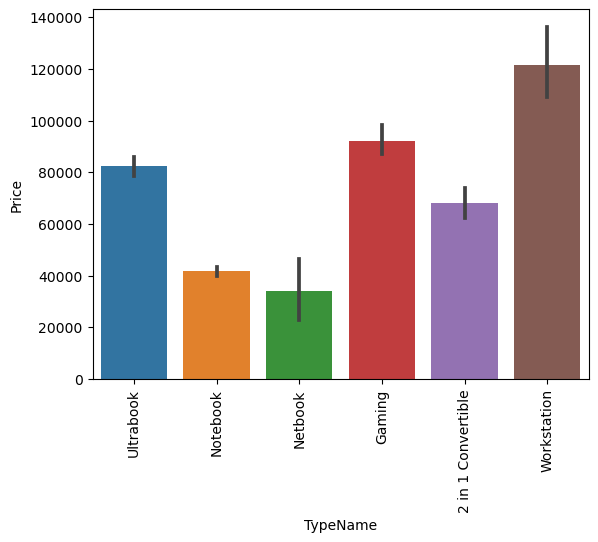

In [21]:
sns.barplot(x=df['TypeName'],y=df['Price'], estimator="mean")
plt.xticks(rotation='vertical')
plt.show()

## Checking screen size distribution

<AxesSubplot:xlabel='Inches', ylabel='Count'>

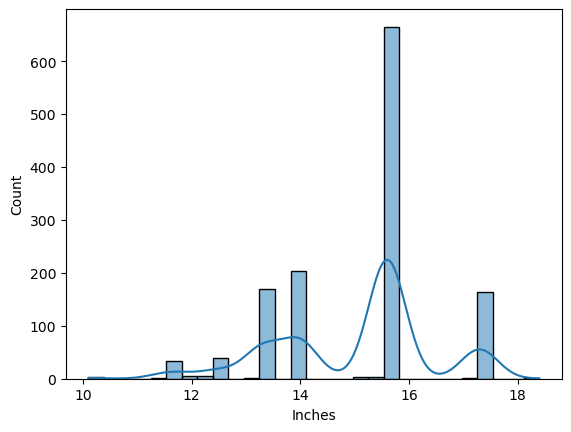

In [22]:
sns.histplot(df['Inches'],kde=True)

## Screen size vs. Price 

<AxesSubplot:xlabel='Inches', ylabel='Price'>

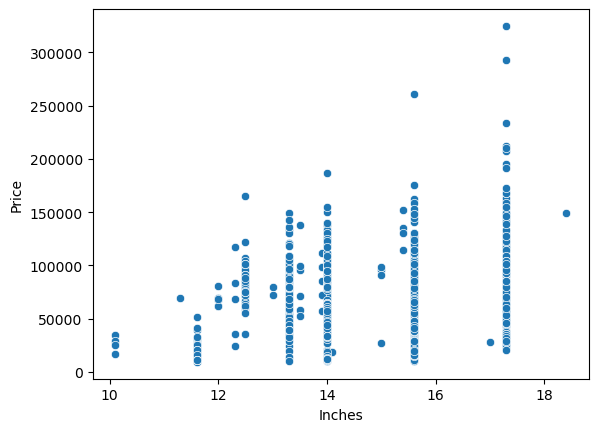

In [23]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

## Screen resolution count

In [24]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

## Creating new feature Touchscreen from ScreenResolution

In [25]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
# View the newly created column df['Touchscreen']
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
272,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 520,Linux,2.14,39164.5296,0
724,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0
1166,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,74059.2000,0
878,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.18,48618.0000,0
126,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.63,43263.3600,0


## Touch vs Non-touchscreen laptops

<AxesSubplot:>

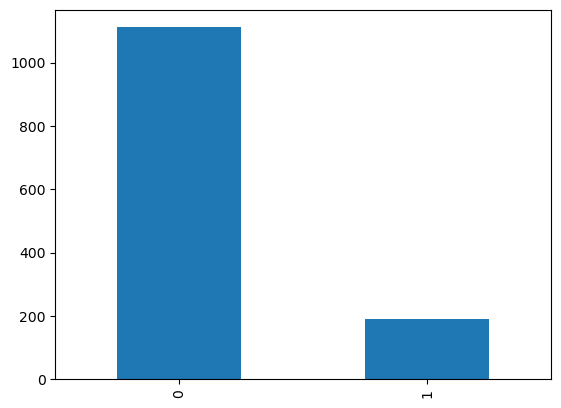

In [27]:
df['Touchscreen'].value_counts().plot(kind='bar')

## Touchscreen laptops are costlier than non-touch

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

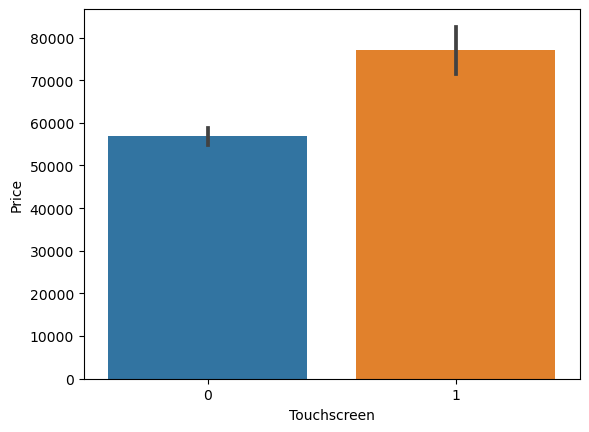

In [28]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

## Generating a new feature IPS display - yes or no

In [29]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


## More non-IPS displays

<AxesSubplot:>

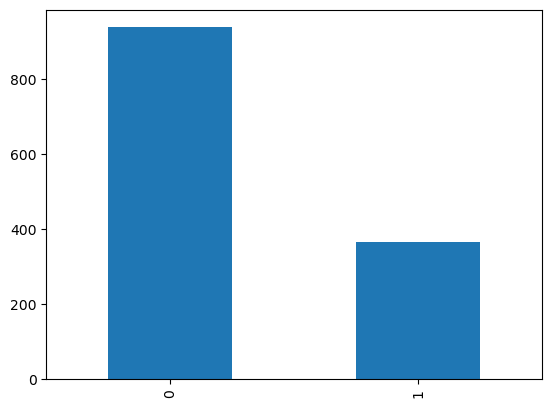

In [31]:
df['Ips'].value_counts().plot(kind='bar')

## Ips display is costlier

<AxesSubplot:xlabel='Ips', ylabel='Price'>

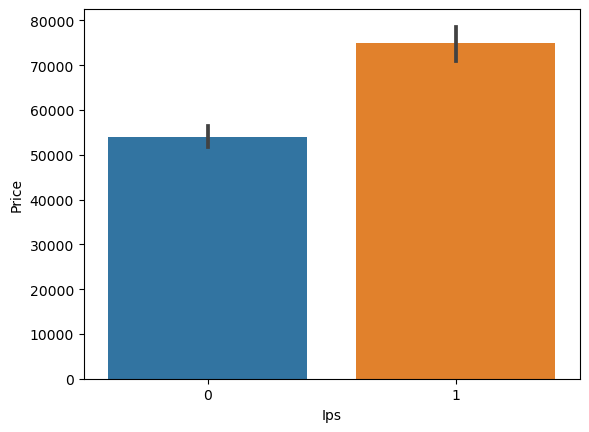

In [32]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [33]:
df["ScreenResolution"]

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [34]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [35]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [36]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [37]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
73,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,58341.6000,0,0,Full HD 1920,1080
720,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,IPS Panel Quad HD+ 2560,1440
1216,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,31861.4400,0,0,1600,900
1119,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0,0,Full HD 1920,1080
1035,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,71874.7200,0,0,Full HD 1920,1080


## Extracting number from whole text

In [38]:
df['X_res'] = df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [39]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
779,Asus,Notebook,15.6,1920x1080,Intel Pentium Dual Core N4200 1.1GHz,8,128GB SSD,Intel HD Graphics 505,Windows 10,2.00,31003.632,0,0,1920,1080
784,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.70,122490.720,0,0,1920,1080
398,Dell,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,144495.360,1,0,3840,2160
509,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.40,61218.720,0,1,1920,1080
1156,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,79536.384,0,0,1920,1080


In [40]:
df["X_res"]

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

## Typecasting X_res, Y_res

In [41]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


## Check input features' correlation with Price

In [43]:
# Feature importance
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

## Making more efficient feature - Pixels Per Inch
## PPI = (sqrt(X_res^2 + Y_res^2) / Inches)

In [44]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [45]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [46]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [47]:
#Feature importance
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [48]:
#Dropping below features because we've created ppi

df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


## Tackling feature Cpu

In [50]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [51]:
df['CPU Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  Ips          1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  CPU Name     1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 122.3+ KB


In [54]:
def fetch_processor(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Intel'
        if text.split()[0]=='Samsung':
            return 'Samsung'
        else:
            return 'AMD'

In [55]:
df['CPU brand']=df['CPU Name'].apply(fetch_processor)

In [56]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Name,CPU brand
337,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,60952.32,0,0,141.211998,Intel Core i5,Intel Core i5
181,Dell,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,74538.72,0,0,165.632118,Intel Core i5,Intel Core i5
1022,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,61218.72,0,1,165.632118,Intel Core i5,Intel Core i5
1065,Dell,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,77682.24,0,0,165.632118,Intel Core i7,Intel Core i7
281,Dell,Notebook,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,22803.84,0,0,141.211998,Intel Core i3,Intel Core i3


## Barplot of various CPU brands

<AxesSubplot:>

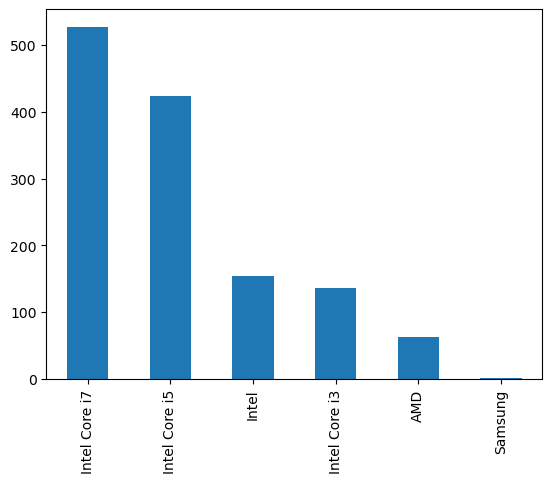

In [57]:
df['CPU brand'].value_counts().plot(kind='bar')

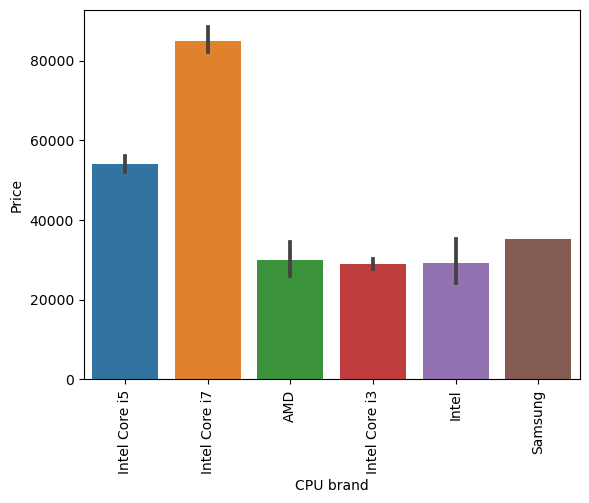

In [58]:
sns.barplot(x=df['CPU brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
#extract ghz 
df['GHz'] = df['Cpu'].apply(lambda x: x.split()[-1].replace('GHz',''))

## More powerful the Cpu, higher is the price

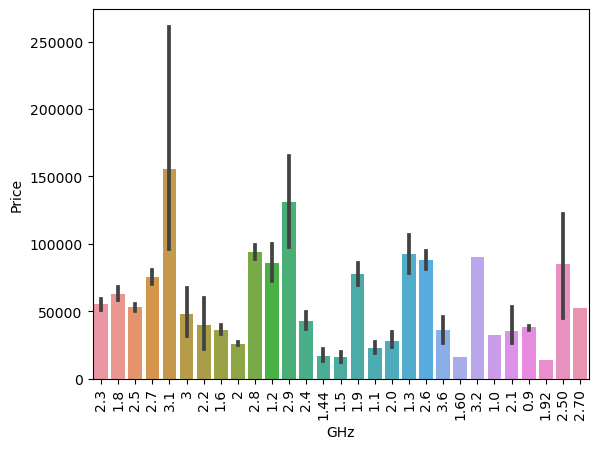

In [147]:
sns.barplot(x=df['GHz'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df.drop(columns =['CPU Name','Cpu'],inplace=True)

## Barplot of RAM

<AxesSubplot:>

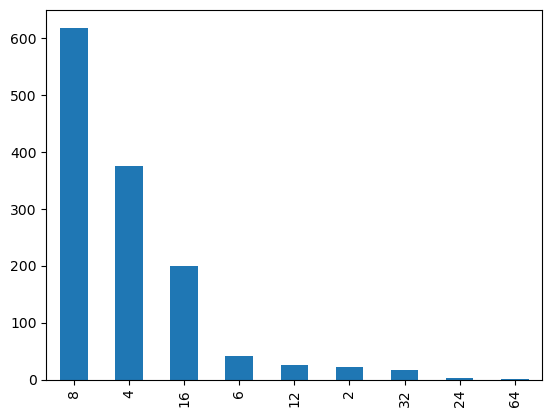

In [61]:
#8gb is the most selling one
df['Ram'].value_counts().plot(kind='bar')

In [62]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int32)

## Higher the RAM, more is the Price

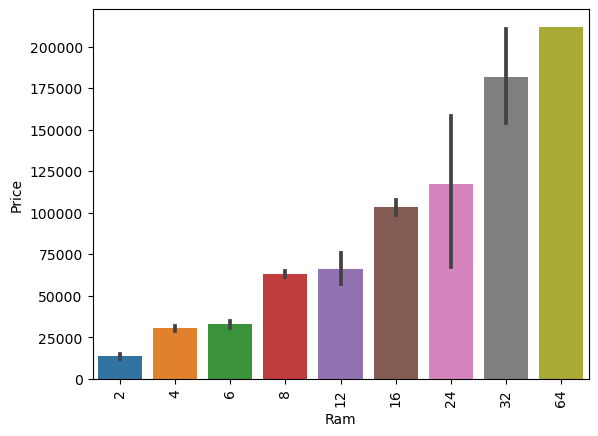

In [63]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU brand,GHz
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1


In [65]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [66]:
#Regex code to eliminate decimals

df['Memory'] = df['Memory'].astype(str)
df['Memory'] = df["Memory"].str.replace('/.0', '', regex=True)

In [67]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

## Making all units common to GB

In [68]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [69]:
df["Memory"].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1.0000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '1.0000 HDD', '512 SSD +  1.0000 Hybrid',
       '256 SSD +  1.0000 Hybrid'], dtype=object)

### Splitting Memory column into 2 separate columns (SSD & HDD)

In [70]:
new = df["Memory"].str.split("+", n = 1, expand=True)

In [71]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [72]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [73]:
df["second"]= new[1]

In [74]:
df["first"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [75]:
df["first"].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD',
       '1.0000 Hybrid', '1000 SSD', '16 SSD', '16 Flash Storage',
       '180 SSD', '32 HDD', '512 Flash Storage', '128 HDD', '240 SSD',
       '8 SSD', '508 Hybrid', '1.0000 HDD'], dtype=object)

In [76]:
df["second"].unique()

array([None, '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1.0000 Hybrid'], dtype=object)

## Creating 4 new columns

In [77]:
df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [78]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU brand,GHz,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,256 SSD,None,0,1,0,0


In [79]:
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

In [80]:
df["second"].fillna("0", inplace = True)

## Creating another 4 new columns

In [81]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [82]:
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

In [83]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [84]:
df["first"]

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: int64

In [85]:
df["second"]

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: second, Length: 1303, dtype: int64

In [86]:
df["Layer1HDD"]

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    1
1302    1
Name: Layer1HDD, Length: 1303, dtype: int64

## Creating the final columns for memory

In [87]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [88]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
675,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,68944.320,0,0,...,0,0,1,0,0,0,1000,256,0,0
518,HP,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.04,47365.920,0,0,...,0,0,0,0,0,0,0,256,0,0
446,Acer,Notebook,4,500 HDD,Intel HD Graphics 620,Linux,2.40,23539.104,0,0,...,0,0,0,0,0,0,500,0,0,0
1061,Asus,Gaming,16,1000 HDD,Nvidia GeForce GTX 965M,No OS,4.00,53173.440,0,1,...,0,0,0,0,0,0,1000,0,0,0
1118,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.05,118601.280,0,0,...,0,0,0,0,0,0,0,512,0,0


In [89]:
#dropping the columns we made for working

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [90]:
df.drop(columns=['Memory'],inplace=True)

In [91]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.093701
SSD              0.670799
Hybrid           0.008747
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [92]:
df['Hybrid'].unique()

array([    0, 10000,   508])

In [93]:
df['Hybrid'].value_counts()

0        1291
10000      11
508         1
Name: Hybrid, dtype: int64

In [94]:
df['Flash_Storage'].value_counts()

0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

In [95]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [96]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.093701
SSD            0.670799
Name: Price, dtype: float64

## Tackling GPU column

In [97]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [98]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [99]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

## Remove all rows where Gpu brand is ARM

In [100]:
df = df[df["Gpu brand"].str.contains("ARM") == False]

In [101]:
df["Gpu brand"]

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu brand, Length: 1302, dtype: object

In [102]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

## Gpu brand vs Price Barplot

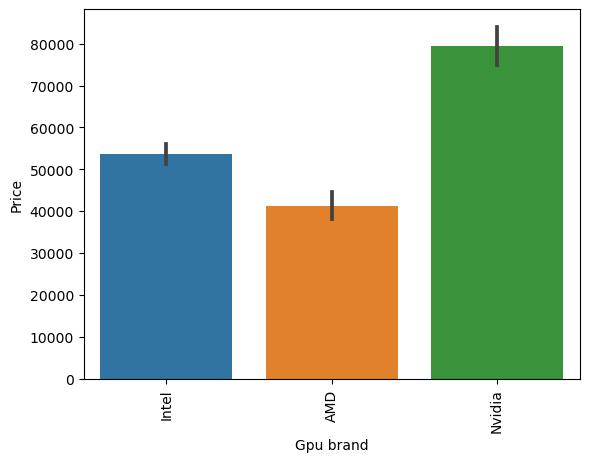

In [103]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [104]:
df.drop(columns=['Gpu'],inplace=True)

## Tackling OpSys feature

In [105]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

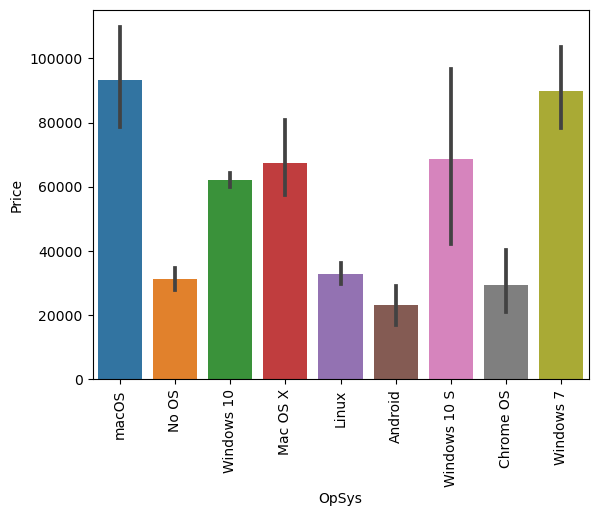

In [106]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Creating popular OS categories

In [107]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [108]:
df['os'] = df['OpSys'].apply(cat_os)

In [109]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU brand,GHz,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256,Intel,Mac


In [110]:
df.drop(columns=['OpSys'],inplace=True)


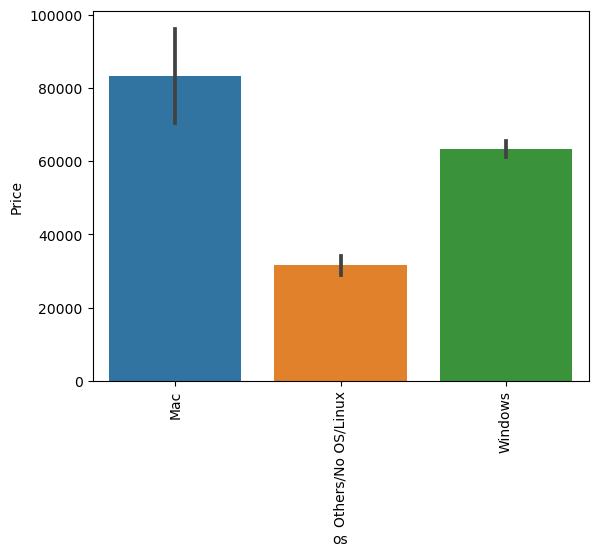

In [111]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


## Tackling weight feature

<AxesSubplot:xlabel='Weight', ylabel='Count'>

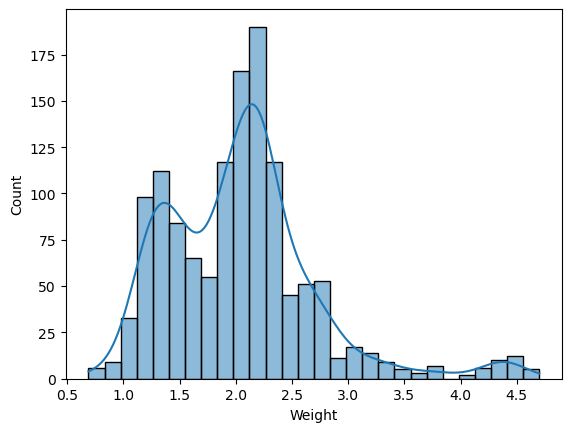

In [112]:
sns.histplot(df['Weight'],kde=True)

## Weight vs Price

<AxesSubplot:xlabel='Weight', ylabel='Price'>

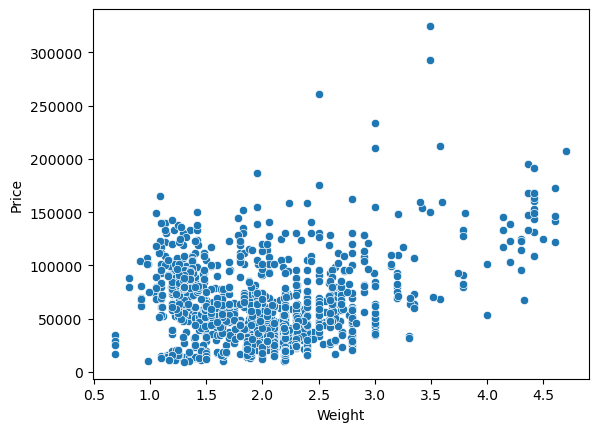

In [113]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

## Pearson correlation coefficient

In [114]:
df.corr()['Price'] 

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.094106
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

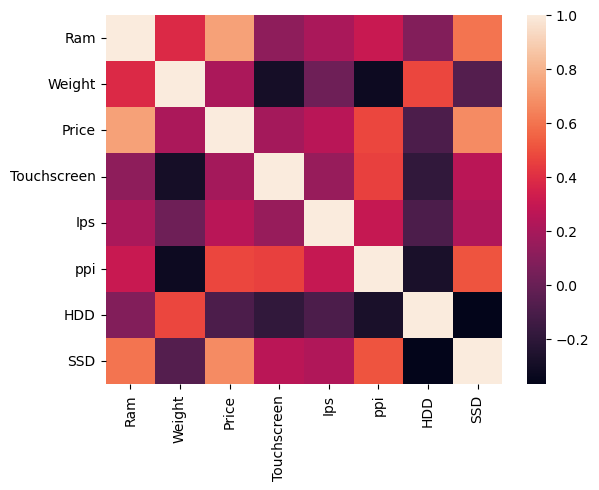

In [115]:
sns.heatmap(df.corr())


<AxesSubplot:xlabel='Price', ylabel='Count'>

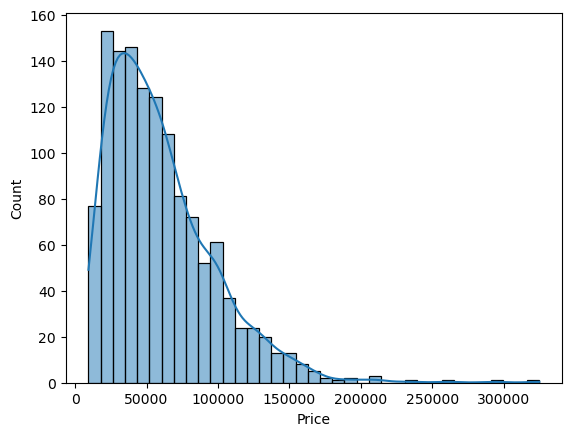

In [116]:
sns.histplot(df["Price"],kde=True)

### Applying log transformation to make Price distribution normal

<AxesSubplot:xlabel='Price', ylabel='Count'>

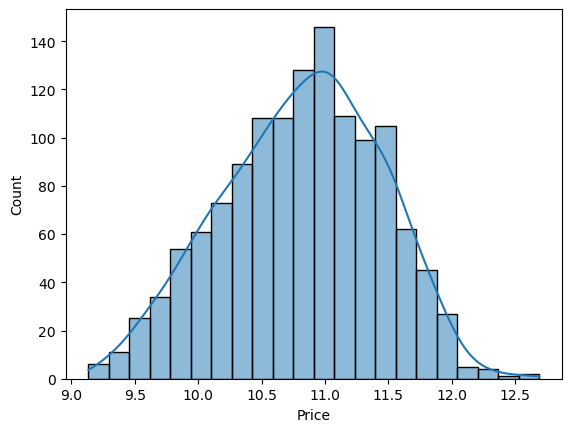

In [117]:
sns.histplot(np.log(df['Price']),kde=True)

## Separating input features from labels

In [118]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [119]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,CPU brand,GHz,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,3.1,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,2.5,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,2.5,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Intel,1.6,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,2.5,1000,0,AMD,Windows


In [120]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

## Squeezing y values between 0 or 1

In [121]:
y = y/10

In [122]:
y

0       1.117575
1       1.077678
2       1.032993
3       1.181448
4       1.147310
          ...   
1298    1.043390
1299    1.128811
1300    0.940928
1301    1.061413
1302    0.988636
Name: Price, Length: 1302, dtype: float64

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [124]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,CPU brand,GHz,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,2.5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,2.8,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Intel,1.6,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,2.3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,2.5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,2,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,2.7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD,2.5,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2,2000,0,Nvidia,Others/No OS/Linux


In [125]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Linear regression

In [127]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8137736835124459
MAE 0.020414981975170297


## Ridge Regression

In [128]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = Ridge(alpha=9,solver='auto',random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8174105270798503
MAE 0.020540810618536576


## Lasso Regression

In [129]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = Lasso(alpha=0.00001,max_iter=100)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8146285965300366
MAE 0.020392512350093768


## KNN

In [130]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=12,weights='distance',p=1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8509773541987391
MAE 0.017119202951991885


## Decision Tree

In [131]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=20,
                              splitter='best',
                              min_samples_leaf=7,
                              min_weight_fraction_leaf=0,
                              max_leaf_nodes=120,
                              ccp_alpha=0,
                              random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8592464613479802
MAE 0.01840805644546585


## SVM

In [132]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = SVR(kernel='rbf',epsilon=0.01,C=1400,gamma='scale')

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8260469545759909
MAE 0.01931446133287776


## Random Forest

In [133]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=155,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.15,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9049256995348303
MAE 0.01491502127563083


## ExtraTrees

In [134]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=95,
                              random_state=3,
                              max_features=0.6,
                              max_depth=14)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8974439167210106
MAE 0.014918200224153444


## AdaBoost

In [135]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=100,learning_rate=0.2,random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8156683307923724
MAE 0.021979824468306607


## Gradient Boost

In [136]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=1000,
                                  max_depth=8,
                                  min_samples_leaf=100,
                                  random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9050750130605786
MAE 0.014916736166432165


## XGBoost

In [137]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,
                     max_depth=5,
                     learning_rate=0.5,
                     random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.911237433443912
MAE 0.014010791027900918


## LightGBM

In [138]:
step1 = ColumnTransformer(transformers=[(
'ohe',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])],remainder='passthrough')

step2 = LGBMRegressor(learning_rate=0.5,
                      n_estimators=100,
                      max_depth=6,
                      random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2) 
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f'R2 score {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

R2 score 0.9118837159836897
MAE 0.01423227099218631


## Catboost

In [139]:
step1 = ColumnTransformer(transformers=[(
'ohe',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])],remainder='passthrough')

step2 = CatBoostRegressor(iterations=200,
                          learning_rate=0.2,
                          depth=15,
                          random_state=0,
                          verbose=False)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f'R2 score {r2_score(y_test,y_pred)}')
print(f'MAE {mean_absolute_error(y_test,y_pred)}')

R2 score 0.9040907957302099
MAE 0.014523484292260223


## Voting Regressor

In [140]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,11,12])
    ],
    remainder='passthrough'
)

rf = RandomForestRegressor(
    n_estimators=155,
    random_state=3,
    max_samples=0.5,
    max_features=0.15,
    max_depth=15
)

lgb = LGBMRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    random_state=0
)

gbdt = GradientBoostingRegressor(
    n_estimators=1000,
    max_depth=8,
    min_samples_leaf=100,
    random_state=0
)

xgb = XGBRegressor(
    n_estimators=45,
    max_depth=5,
    learning_rate=0.5,
    random_state=0
)

et = ExtraTreesRegressor(
    n_estimators=95,
    random_state=3,
    max_features=0.6,
    max_depth=14
)

catb = CatBoostRegressor(
    iterations=200,
    learning_rate=0.2,
    depth=15,
    random_state=0,
    verbose=False
)

step2 = VotingRegressor([
    ('rf', rf), ('lgb', lgb), ('gbdt', gbdt), ('xgb', xgb), ('et', et), ('catb', catb)
], weights=[1, 2, 1, 1, 1, 2])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.923540453628938
MAE 0.013232282694897565


## Stacking Regressor

In [141]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,11,12])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=155,
                                 random_state=3,
                                 max_samples=0.5,
                                 max_features=0.15,
                                 max_depth=15)),
    
    ('et',ExtraTreesRegressor(n_estimators=95,
                              random_state=3,
                              max_features=0.6,
                              max_depth=14)),
    
    ('lgb',LGBMRegressor(learning_rate=0.5,
                         n_estimators=100,
                         max_depth=6,
                         random_state=0)),
   
    ('gbdt',GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=8,
                                      min_samples_leaf=100,
                                      random_state=0)),
    
    ('xgb', XGBRegressor(n_estimators=45,
                         max_depth=5,
                         learning_rate=0.5,
                         random_state=0)),
    
    ('catb', CatBoostRegressor(iterations=200,
                               learning_rate=0.2,
                               depth=15,
                               random_state=0,
                               verbose=False))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=0.2))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9244856706323794
MAE 0.013120304265966092


### Highest R2 score: Stacking Regressor Model
### Exporting Stacking Regressor Model

In [142]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [143]:
X_test.sample()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,CPU brand,GHz,HDD,SSD,Gpu brand,os
869,Dell,Workstation,8,2.23,0,0,141.211998,Intel Core i7,2.8,1000,0,Nvidia,Windows


## Testing model on input example
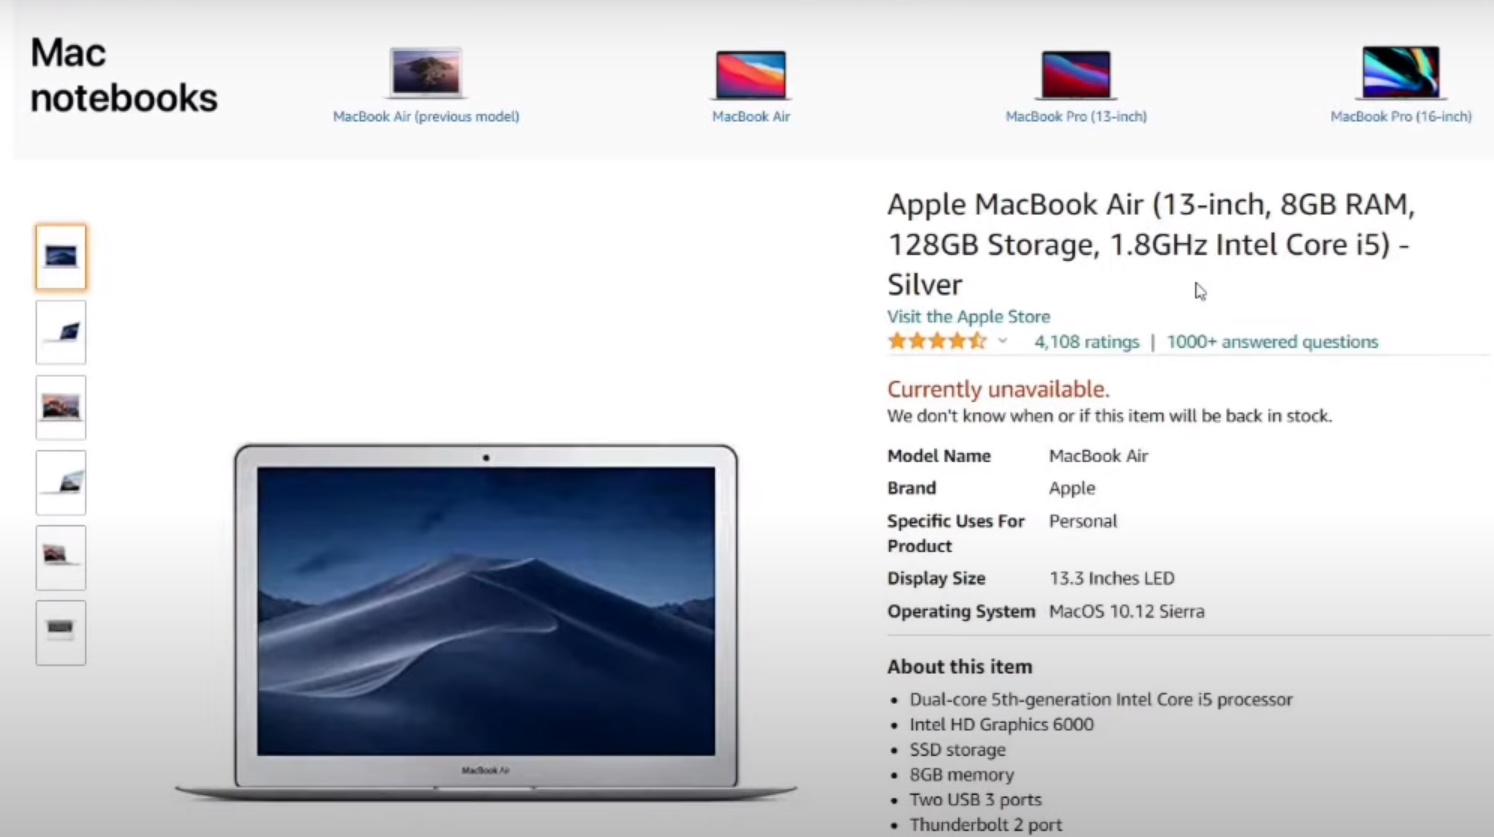

In [144]:
input_example = [["Apple","Ultrabook",8,1.37,0,1,227,"Intel Core i5",1.8,0,128,"Intel","Mac"]]

In [145]:
y_pred = pipe.predict(input_example)

In [146]:
# predicted price = e^(predicted price *10)
# taking inverse transform of (log and division by 10)

predicted_price = np.exp(y_pred*10)
print("The predicted price for your laptop is: Rs.",int(predicted_price))

The predicted price for your laptop is: Rs. 74641
